<a href="https://colab.research.google.com/github/SamiCakiral/YOLONAS-XSens_Compare/blob/main/R%26D-IMT-Mines-Al%C3%A8s-YOLO-XSENS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Résultats obtenus et Analyse**

##Dans cette partie nous allons vous présenter les résultats obtenus après la mise en pratique de notre démarche et nous analyserons ces résultats pour tirer les conclusions que nous recherchions##

In [ ]:
# @title On commence par l'import des fichiers contenant les différents angles pour chaque frame obtenus à la fin du code précédent


import gdown
import zipfile
import os

# URL du fichier ZIP sur Google Drive
url = 'https://drive.google.com/uc?id=18stBvPNgiNPPYHZGjuaQq2ym7UZ798Fo'

output_zip_path = '/content/csv.zip'

# Dossier cible pour extraire le contenu du fichier ZIP
extract_to_folder = '/content/csv'

# Créez le dossier s'il n'existe pas
if not os.path.exists(extract_to_folder):
    os.makedirs(extract_to_folder)

# Téléchargez le fichier ZIP
gdown.download(url, output_zip_path, quiet=False)

# Décompressez le fichier ZIP
with zipfile.ZipFile(output_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_folder)

# Supprimez le fichier ZIP si vous n'en avez plus besoin
os.remove(output_zip_path)

print(f'Les fichiers CSV ont été extraits dans {extract_to_folder}')
#drive.google.com

Downloading...
From (original): https://drive.google.com/uc?id=18stBvPNgiNPPYHZGjuaQq2ym7UZ798Fo
From (redirected): https://drive.google.com/uc?id=18stBvPNgiNPPYHZGjuaQq2ym7UZ798Fo&confirm=t&uuid=887b873a-efcf-4a4e-b48d-78fa27cd7a48
To: /content/csv.zip
100%|██████████| 160M/160M [00:02<00:00, 73.8MB/s]


Les fichiers CSV ont été extraits dans /content/csv


In [ ]:
# @title On vérifie que cela a fonctionné :

# Chemin vers le dossier contenant les fichiers extraits
csv_folder_path = '/content/csv'

# Lister tous les fichiers dans ce dossier
csv_files = os.listdir(csv_folder_path)
print("Fichiers trouvés :", csv_files)

Fichiers trouvés : ['prise3', 'prise2', 'prise1']


In [ ]:
# @title #Accès aux données

import os
import pandas as pd

# Chemin vers le dossier contenant les fichiers extraits
csv_folder_path = '/content/csv'

# Parcourir chaque sous-dossier
for prise in sorted(os.listdir(csv_folder_path)):
    prise_path = os.path.join(csv_folder_path, prise)
    if os.path.isdir(prise_path):  # S'assurer que c'est un dossier
        # Lister tous les fichiers dans le sous-dossier
        files_in_prise = os.listdir(prise_path)
        print(f"Fichiers dans {prise}:", files_in_prise)

        # Lire chaque fichier CSV dans le sous-dossier
        for file in files_in_prise:
            file_path = os.path.join(prise_path, file)

            # Lire le fichier CSV
            data = pd.read_csv(file_path)



Fichiers dans prise1: ['anglesXSens1.csv', 'anglesW1.csv', 'delta1.csv', 'cleanDelta1.csv', 'allVid1.csv', 'anglesW1Ok.csv', 'allVid1Ok.csv', 'xSens1.xlsx']


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x86 in position 11: invalid start byte

Nous allons maintenant analyser la première prise mouvement par mouvement en parallèle au protocole et à la vidéo.

In [ ]:
# @title #On commence par étudier le fichier 'allVid1Ok.csv' qui est le fichier contenant les données concernant les données de la prise 1 avec toute les POV à savoir front, side et webcam.


# Nom du sous-dossier et du fichier cible
prise_folder = 'prise1'
target_file = 'allVid1Ok.csv'

# Construire le chemin complet vers le fichier cible
file_path = os.path.join(csv_folder_path, prise_folder, target_file)

# Vérifier si le fichier existe et le lire
if os.path.exists(file_path):
    data = pd.read_csv(file_path)

    # Afficher les premières lignes du fichier
    print(f"Affichage des données de {target_file} dans {prise_folder}:")
    print(data.head())
else:
    print(f"Le fichier {target_file} n'existe pas dans {prise_folder}")


In [ ]:
#Passons à l'analyse.

"""Le protocole se décompose en mouvements s'inscrivant chacun sur un certain nombre de frames dont on peut accéder aux indices approximatifs pour créer
l'intervalle sur lequel se porte le mouvement et cela en regardant le temps sur lequel le mouvement s'effectue sur la vidéo et en multipliant ce temps
par le de nombre fps (frame per second) de notre vidéo qui est à 60.
"""


"Le protocole se décompose en mouvements s'inscrivant chacun sur un certain nombre de frames dont on peut accéder aux indices approximatifs pour créer\nl'intervalle sur lequel se porte le mouvement et cela en regardant le temps sur lequel le mouvement s'effectue sur la vidéo et en multipliant ce temps\npar le de nombre fps (frame per second) de notre vidéo qui est à 60.\n"

In [ ]:
# @title Calculs pour l'ensemble des phases
# Définition de la liste des intervalles de secondes associée à chacune des phases
L =  [[1, 'Marche lente', 6, 11], [2, 'Marche rapide', 12, 15], [3, 'Carton', 16, 22],[4,'Saut',24,26.5],[5,'Tour sur place',27,29.8],[6,'4 inclinaisons',30.5,38],[7,'4 quarts de saut',38,43],[8, 'Poignée de main',44,46],[9,'Lancer de balle',46.5,49],[10,'Shadow boxing',50,53.5]]
# Conversion en liste d'intervalles de frames (en supposant 30 fps)
L_frames = [[L[i][0], L[i][1], L[i][2] * 30, L[i][3] * 30] for i in range(len(L))]

def calculate_confidence_stats_indexed_phases(data, frame_intervals, pov):
    results = {}

    # Créer une liste des colonnes de confiance
    confidence_columns = [col for col in data.columns if 'Confidence' in col]

    for interval in frame_intervals:
        index, phase_name, start_frame, end_frame = interval

        # Filtrer pour obtenir les frames dans l'intervalle spécifié avec POV donné
        filtered_data = data[(data['Frame'] >= start_frame) & (data['Frame'] <= end_frame) & (data['POV'] == pov)]

        # Sélectionner seulement les colonnes de confiance pour les lignes filtrées
        confidence_data = filtered_data['Confidence Bras Gauche'] #On prend une des confidences, car elles sont égales

        # Calculer la moyenne pour la colonne de confiance
        mean_confidence = round(confidence_data.mean(), 2)

        # Stocker les résultats dans un dictionnaire avec le nom de la phase comme clé
        results[phase_name] = {
            'index': index,
            'confidence': mean_confidence,
            #'std': std_confidence
        }

    return results

L_front1=[]

# Application de la fonction sur les intervalles définis et affichage des résultats
resultats_povA = calculate_confidence_stats_indexed_phases(data, L_frames, pov='front1.avi')
for phase_name, stats in resultats_povA.items():
    print(f"Résultats pour {phase_name} (Phase {stats['index']}):")
    print("Score de confiance pour la phase "+phase_name+" :")
    print(stats['confidence'])
    L_front1.append(stats['confidence'])
    print("\n")

print(L_front1)


Résultats pour Marche lente (Phase 1):
Score de confiance pour la phase Marche lente :
0.88


Résultats pour Marche rapide (Phase 2):
Score de confiance pour la phase Marche rapide :
0.87


Résultats pour Carton (Phase 3):
Score de confiance pour la phase Carton :
0.85


Résultats pour Saut (Phase 4):
Score de confiance pour la phase Saut :
0.87


Résultats pour Tour sur place (Phase 5):
Score de confiance pour la phase Tour sur place :
0.87


Résultats pour 4 inclinaisons (Phase 6):
Score de confiance pour la phase 4 inclinaisons :
0.87


Résultats pour 4 quarts de saut (Phase 7):
Score de confiance pour la phase 4 quarts de saut :
0.86


Résultats pour Poignée de main (Phase 8):
Score de confiance pour la phase Poignée de main :
0.88


Résultats pour Lancer de balle (Phase 9):
Score de confiance pour la phase Lancer de balle :
0.88


Résultats pour Shadow boxing (Phase 10):
Score de confiance pour la phase Shadow boxing :
0.84


[0.88, 0.87, 0.85, 0.87, 0.87, 0.87, 0.86, 0.88, 0.88, 

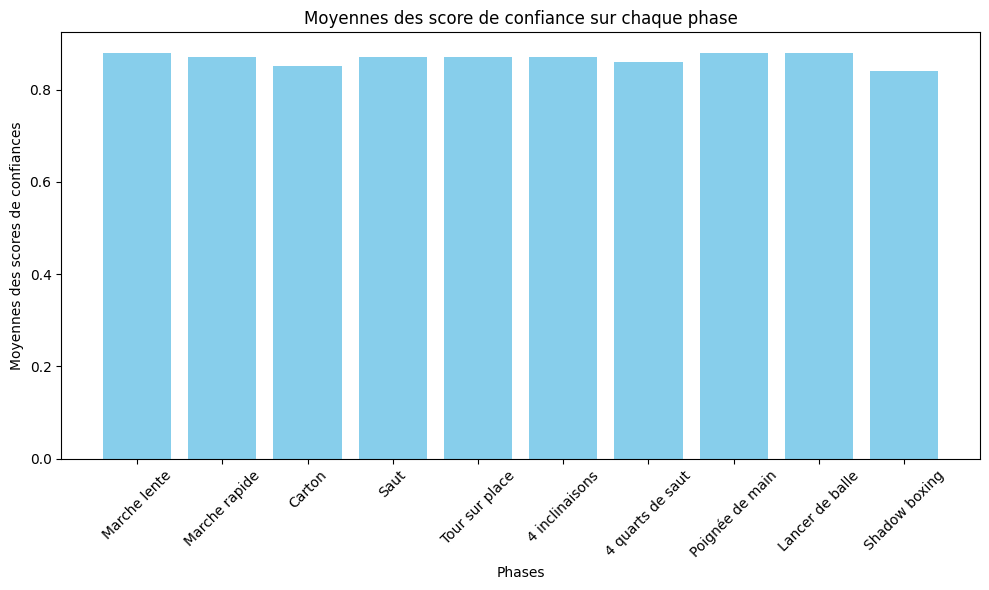

In [ ]:
# @title Histogramme
import matplotlib.pyplot as plt

# Calculer la moyenne des moyennes pour chaque phase
phase_names = []
mean_of_means = []

for phase_name, stats in resultats_povA.items():
    # Calculer la moyenne des moyennes des confidences
    mean_confidence_mean = stats['confidence'].mean()
    phase_names.append(phase_name)
    mean_of_means.append(mean_confidence_mean)

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(phase_names, mean_of_means, color='skyblue')
plt.xlabel('Phases')
plt.ylabel('Moyennes des scores de confiances')
plt.title('Moyennes des score de confiance sur chaque phase')
plt.xticks(rotation=45)  # Incliner les noms des phases pour une meilleure lisibilité
plt.tight_layout()  # Ajuste automatiquement les sous-graphiques pour qu'ils tiennent dans la figure
plt.show()


Cette première analyse de manière globale nous permet de remarquer que les performances de yolo-nas sont satisfaisantes avec un score de confiance toujours aux alentours de 0.87. De plus, certains mouvements semblent mal capturés par rapport à d'autres comme la phase carton et la phase shadow boxing qui sont des phases complexes chacune à leur manière. Nous allons maintenant procéder à une analyse plus poussée où nous prenons en compte tout les points de vues (POV).

In [ ]:
# @title Il s'agit ici d'appliquer le même script qu'à la POV front aux POV side et webcam pour observer les différences.

# @title Calculs pour l'ensemble des phases
# Définition de la liste des intervalles de secondes associée à chacune des phases
L =  [[1, 'Marche lente', 6, 11], [2, 'Marche rapide', 12, 15], [3, 'Carton', 16, 22],[4,'Saut',24,26.5],[5,'Tour sur place',27,29.8],[6,'4 inclinaisons',30.5,38],[7,'4 quarts de saut',38,43],[8, 'Poignée de main',44,46],[9,'Lancer de balle',46.5,49],[10,'Shadow boxing',50,53.5]]
# Conversion en liste d'intervalles de frames (en supposant 30 fps)
L_frames = [[L[i][0], L[i][1], L[i][2] * 30, L[i][3] * 30] for i in range(len(L))]


#Application pour la pov SIDE1:

#Liste pour stocker les résultats associée à cette pov
L_side1=[]

# Application de la fonction sur les intervalles définis et affichage des résultats
resultats_povB = calculate_confidence_stats_indexed_phases(data, L_frames, pov='side1.avi')
for phase_name, stats in resultats_povB.items():
    print('POV SIDE1')
    print(f"Résultats pour {phase_name} (Phase {stats['index']}):")
    print("Score de confiance pour la phase "+phase_name+" :")
    print(stats['confidence'])
    L_side1.append(stats['confidence'])
    print("\n")

print(L_side1)


#Application pour la pov WEBCAM1:

#Liste pour stocker les résultats associée à cette pov
L_webcam1=[]

# Application de la fonction sur les intervalles définis et affichage des résultats
resultats_povB = calculate_confidence_stats_indexed_phases(data, L_frames, pov='webcam1.avi')
for phase_name, stats in resultats_povB.items():
    print('POV WEBCAM1')
    print(f"Résultats pour {phase_name} (Phase {stats['index']}):")
    print("Score de confiance pour la phase "+phase_name+" :")
    print(stats['confidence'])
    L_webcam1.append(stats['confidence'])
    print("\n")

print(L_webcam1)

POV SIDE1
Résultats pour Marche lente (Phase 1):
Score de confiance pour la phase Marche lente :
0.83


POV SIDE1
Résultats pour Marche rapide (Phase 2):
Score de confiance pour la phase Marche rapide :
0.84


POV SIDE1
Résultats pour Carton (Phase 3):
Score de confiance pour la phase Carton :
0.83


POV SIDE1
Résultats pour Saut (Phase 4):
Score de confiance pour la phase Saut :
0.85


POV SIDE1
Résultats pour Tour sur place (Phase 5):
Score de confiance pour la phase Tour sur place :
0.84


POV SIDE1
Résultats pour 4 inclinaisons (Phase 6):
Score de confiance pour la phase 4 inclinaisons :
0.83


POV SIDE1
Résultats pour 4 quarts de saut (Phase 7):
Score de confiance pour la phase 4 quarts de saut :
0.85


POV SIDE1
Résultats pour Poignée de main (Phase 8):
Score de confiance pour la phase Poignée de main :
0.83


POV SIDE1
Résultats pour Lancer de balle (Phase 9):
Score de confiance pour la phase Lancer de balle :
0.84


POV SIDE1
Résultats pour Shadow boxing (Phase 10):
Score de co

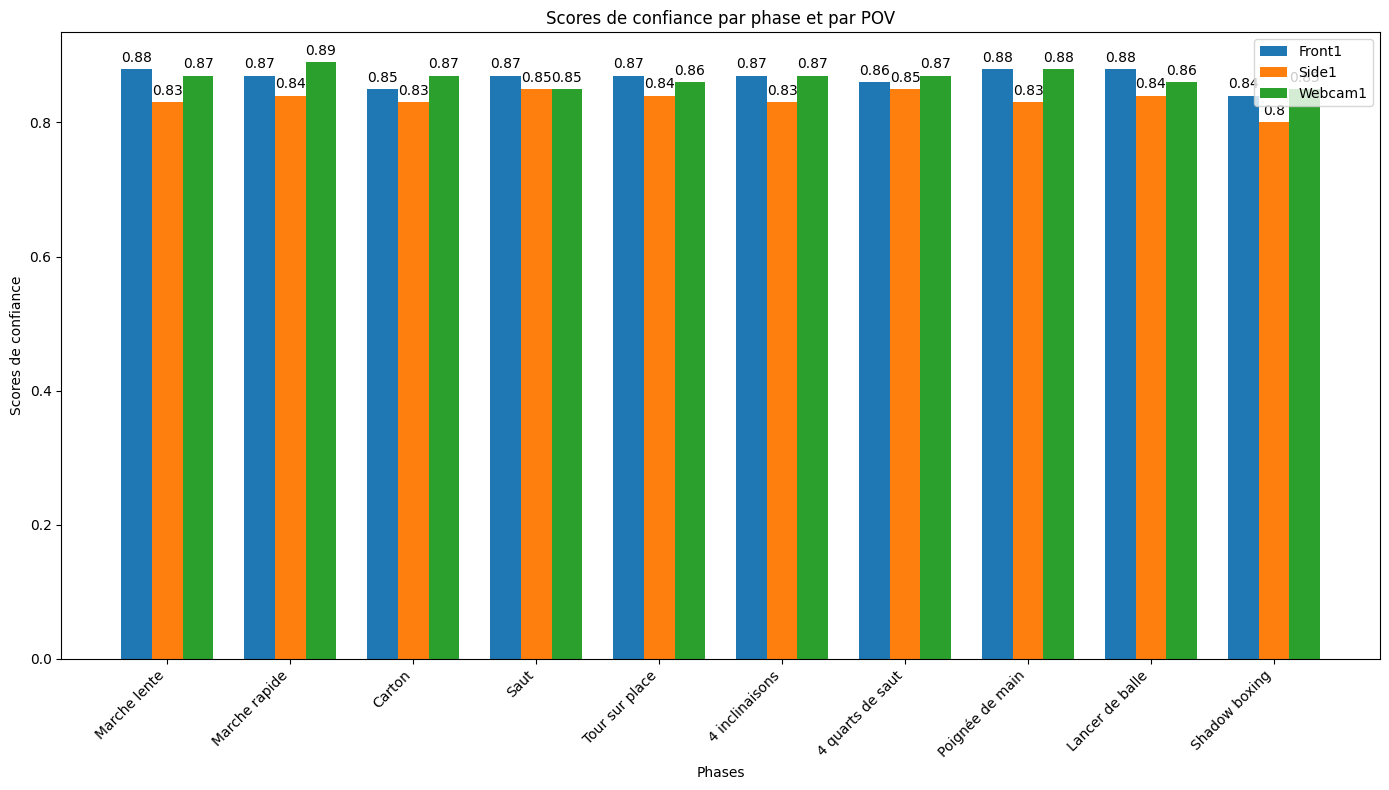

In [ ]:
# @title Un tracé pour visualiser cette expérience.

import matplotlib.pyplot as plt
import numpy as np

# Noms des phases pour les étiquettes sur l'axe des x
phases = ['Marche lente', 'Marche rapide', 'Carton', 'Saut', 'Tour sur place', '4 inclinaisons', '4 quarts de saut', 'Poignée de main', 'Lancer de balle', 'Shadow boxing']

# Définition de la position des groupes sur l'axe des x
x = np.arange(len(phases))  # les labels des locations
width = 0.25  # largeur des barres

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width, L_front1, width, label='Front1')
rects2 = ax.bar(x, L_side1, width, label='Side1')
rects3 = ax.bar(x + width, L_webcam1, width, label='Webcam1')

# Ajout de textes pour les labels, titre et axes ticks
ax.set_xlabel('Phases')
ax.set_ylabel('Scores de confiance')
ax.set_title('Scores de confiance par phase et par POV')
ax.set_xticks(x)
ax.set_xticklabels(phases, rotation=45, ha="right")
ax.legend()

# Fonction pour ajouter les valeurs sur les barres
def autolabel(rects):
    """Attache une étiquette au-dessus de chaque barre dans *rects*, affichant sa hauteur."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points de décalage vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

# Appel de la fonction pour ajouter les étiquettes
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Affichage du graphique
plt.tight_layout()
plt.show()




###Analyse de l'histogramme de l'évolution du score de confiance par phase et par pov
On remarque qu'on à trois score de confiance différents selon les point de vue donc l'efficacité de yolo-nas varie consiférablement selon le placement de la caméra utilisée pour la création de la vidéo utilisée.
Le point de vue side1 donc d'une caméra placée sur le côté et permettant de voir l'acteur de profil lors de l'éxecution du protocole est toujours le moins bon ce qui peut s'expliquer par le fait que de profil, il est plus difficile pour yolo-nas de voir l'entièreté du corps de l'acteur, cela se rapproche même en théorie de la moitié par moment. Ainsi le placement d'une partie de ses points clés sur le corps de l'acteur se fait de manière bien plus approximative que si l'angle de vue était moindre comme avec les deux autres points de vue.
Cependant, le niveau de performance entre les point de vue de la webcam et front varie, avec une meilleure capture pour la marche rapide et la poignée de main pour la webcam ou au contraire une meilleure appréciation pour le point de vue front sur le lancer de balle ou le tour sur place. Selon l'utilisation, ces score peuvent signifier que yolo-nas est suffisemment performant ou non puisque tourner autour des 0.87 serait suffisant pour détecter certains objets mais pas pour d'autres dont la structure et le mouvement serait plus complexe.

In [ ]:
# @title Procédons maintenant à une analyse prenant en compte les autres pov pour voir si ces conclusions se confirment.

#On commence par définir les deux listes d'intervalles associée aux deux prochaines vidéos.
L2=[[1,'Marche lente',3,9.8],[2,'Marche rapide',10,14],[3,'Carton',15,20.7],[4,'Saut',23,24.5],[5,'Tour sur place',27.2,29],[6,'4 inclinaisons',30,37],[7,'4 quarts de saut',38,42],[8,'Poignée de main',43.6,45.1],[9,'Lancer de balle',47.5,49.5],[10,'Shadow boxing',51.5,55]]
L3=[[1,'Marche lente',2.8,11],[2,'Marche rapide',12,16.5],[3,'Carton',17,23],[4,'Saut',25,26.8],[5,'Tour sur place',27.9,30.3],[6,'4 inclinaisons',31.7,40.5],[7,'4 quarts de saut',43,50],[8,'Poignée de main',52,55],[9,'Lancer de balle',57,60],[10,'Shadow boxing',61.5,65]]

#On rappelle la liste pour la première vidéo
L =  [[1, 'Marche lente', 6, 11], [2, 'Marche rapide', 12, 15], [3, 'Carton', 16, 22],[4,'Saut',24,26.5],[5,'Tour sur place',27,29.8],[6,'4 inclinaisons',30.5,38],[7,'4 quarts de saut',38,43],[8, 'Poignée de main',44,46],[9,'Lancer de balle',46.5,49],[10,'Shadow boxing',50,53.5]]

#Conversion en intervalles de frames:
def convert_intervals_to_frames(intervals):
    return [[phase[0], phase[1], int(phase[2] * 30), int(phase[3] * 30)] for phase in intervals]

L_frames = convert_intervals_to_frames(L)
L2_frames = convert_intervals_to_frames(L2)
L3_frames = convert_intervals_to_frames(L3)

def calculate_confidence_stats_for_video(csv_file, frame_intervals, pov):
    results = {}
    confidence_columns = [col for col in data.columns if 'Confidence' in col]

    for interval in frame_intervals:
        index, phase_name, start_frame, end_frame = interval
        filtered_data = data[(data['Frame'] >= start_frame) & (data['Frame'] <= end_frame) & (data['POV'] == pov)]
        confidence_data = filtered_data[confidence_columns]
        mean_confidence = round(confidence_data.mean().mean(), 2)  # Calculating global mean and rounding to 2 decimal places
        results[phase_name] = mean_confidence

    return results


results_vid1_front = calculate_confidence_stats_for_video('allVidOk.csv', L_frames, 'front1.avi')
results_vid2_front = calculate_confidence_stats_for_video('allVidOk2.csv', L2_frames, 'front2.avi')
results_vid3_front = calculate_confidence_stats_for_video('allVidOk3.csv', L3_frames, 'front3.avi')

print("Results for Video 1:", results_vid1_front)
print("Results for Video 2:", results_vid2_front)
print("Results for Video 3:", results_vid3_front)



Results for Video 1: {'Marche lente': 0.88, 'Marche rapide': 0.87, 'Carton': 0.85, 'Saut': 0.87, 'Tour sur place': 0.87, '4 inclinaisons': 0.87, '4 quarts de saut': 0.86, 'Poignée de main': 0.88, 'Lancer de balle': 0.88, 'Shadow boxing': 0.84}
Results for Video 2: {'Marche lente': 0.89, 'Marche rapide': 0.87, 'Carton': 0.85, 'Saut': 0.88, 'Tour sur place': 0.87, '4 inclinaisons': 0.87, '4 quarts de saut': 0.86, 'Poignée de main': 0.89, 'Lancer de balle': 0.88, 'Shadow boxing': 0.86}
Results for Video 3: {'Marche lente': 0.89, 'Marche rapide': 0.87, 'Carton': 0.84, 'Saut': 0.86, 'Tour sur place': 0.87, '4 inclinaisons': 0.86, '4 quarts de saut': 0.88, 'Poignée de main': 0.87, 'Lancer de balle': nan, 'Shadow boxing': nan}


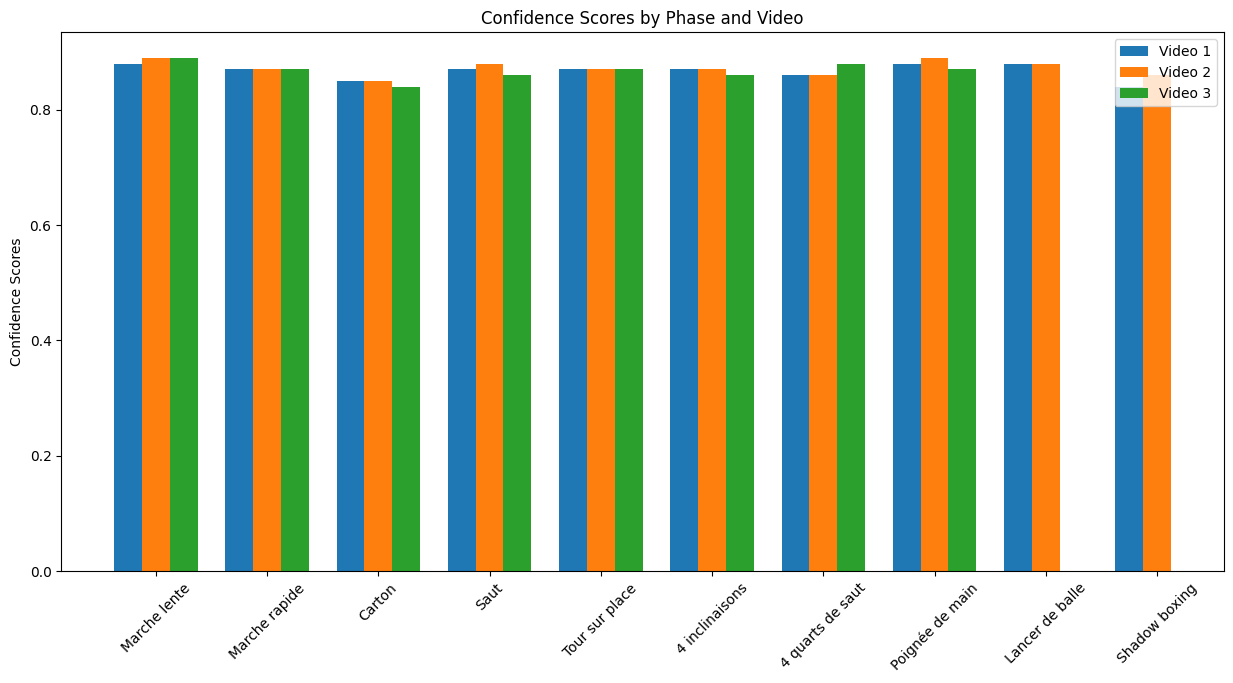

In [ ]:
# @title Visualisation
import numpy as np

phases = [phase[1] for phase in L]  # Assuming all lists have the same phase names
x = np.arange(len(phases))
width = 0.25

fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(x - width, [results_vid1[phase] for phase in phases], width, label='Video 1')
ax.bar(x, [results_vid2[phase] for phase in phases], width, label='Video 2')
ax.bar(x + width, [results_vid3[phase] for phase in phases], width, label='Video 3')

ax.set_ylabel('Confidence Scores')
ax.set_title('Confidence Scores by Phase and Video')
ax.set_xticks(x)
ax.set_xticklabels(phases, rotation=45)
ax.legend()

plt.show()



On remarque ainsi que yolo-nas a une certaine régularité en termes de performance puisque indépendemment de la vidéo, le niveau de performance est toujours élevé et environ constant. De plus la conclusion tirée sur l'efficacité
de yolo-nas sur une vidéo selon l'angle de vue à partir de l'analyse sur les pov de la vidéo 1 est confirmée sur les autres vidéos.

###Nous allons maintenant analyser les écarts entre les résultats obtenus par yolo-nas et ceux du module xsens.

In [ ]:
# @title Commençons ainsi
import pandas as pd

def clean_offset(df, threshold=120):  # 90% de 180 est 162
    # Parcourir toutes les colonnes sauf 'Frame'
    for col in df.columns:
        if col != 'Frame':
            # Calculer la moyenne absolue de la colonne
            avg_value = df[col].abs().mean()

            # Si la moyenne absolue est proche de 180, ajuster toute la colonne
            if avg_value > threshold:
                offset = 180 if avg_value > 0 else -180
                df[col] = df[col].apply(lambda x: x + offset if x * offset < 0 else x)

    return df


i= "1" # Change ca pour changer la prise

# Path to the deltaX.csv file
file_path = "csv/prise"+i+'/delta'+i+'.csv'
output_file = "csv/prise"+i+'/cleanDelta'+i+'.csv'

xSensAnglesFile = "csv/prise"+i+'/anglesXSens'+i+'.csv'
yoloAnglesFile = "csv/prise"+i+'/allVid'+i+'Ok.csv'
outputDeltaName = "csv/prise"+i+'/delta'+i+'.csv'
outputRelativeErrorFile = "csv/prise"+i+'/deltaRelative'+i+'.csv'
# Load the first CSV file
df1 = pd.read_csv(xSensAnglesFile)

# Load the second CSV file
df2 = pd.read_csv(yoloAnglesFile)

# Drop the rows where POV is not "webcam1.avi"
df2 = df2[df2['POV'].str.lower() == 'webcam1.avi']


#Drop in df2 all the columns that are not in df1
df2 = df2[df1.columns]


# Ensure that both dataframes have the same columns
assert set(df1.columns) == set(df2.columns), "The dataframes do not have the same columns"

# Downsample df1 to match the frame rate of df2
df1 = df1.iloc[::2, :]

df1["Frame"] = range(len(df1))
#drop the rows that are higher than the length of df2
df1 = df1.iloc[:len(df2)]

#make index = Frame but keep the Frame column
df1 = df1.set_index('Frame')
df1 = df1.reset_index()

df2 = df2.set_index('Frame')
df2 = df2.reset_index()


# Truncate df1 to have the same number of rows as df2
df1 = df1.iloc[:len(df2)]
# Create a new dataframe to store the differences
df_diff = pd.DataFrame()

# Compute the difference for each column for the same frame
df_diff['Frame'] = df1['Frame']
for column in df1.columns:
    if column != 'Frame':
        df_diff[column] = df1[column] - df2[column]


df_diff = df_diff.fillna(0)
# Save the result to a new CSV file
df_diff.to_csv(outputDeltaName, index=False)

# Lire le fichier CSV dans un DataFrame
df = pd.read_csv(file_path)

# Nettoyer les offsets
df_cleaned = clean_offset(df)

# Sauvegarder le DataFrame nettoyé dans un nouveau fichier CSV
df_cleaned.to_csv(output_file, index=False)

# Calcul des erreurs relatives en pourcentage
df_relative_error = pd.DataFrame()
df_relative_error['Frame'] = df_diff['Frame']

for column in df_diff.columns:
    if column != 'Frame':
        # Calcul de l'erreur relative en utilisant la valeur absolue des différences divisée par la valeur absolue des mesures xSens
        df_relative_error[column] = abs(df_diff[column]) / df1[column].abs() * 100

# Enregistrement des erreurs relatives dans un fichier CSV
df_relative_error.to_csv(outputRelativeErrorFile, index=False)




<ipython-input-11-e1c6ad6169db>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Frame"] = range(len(df1))


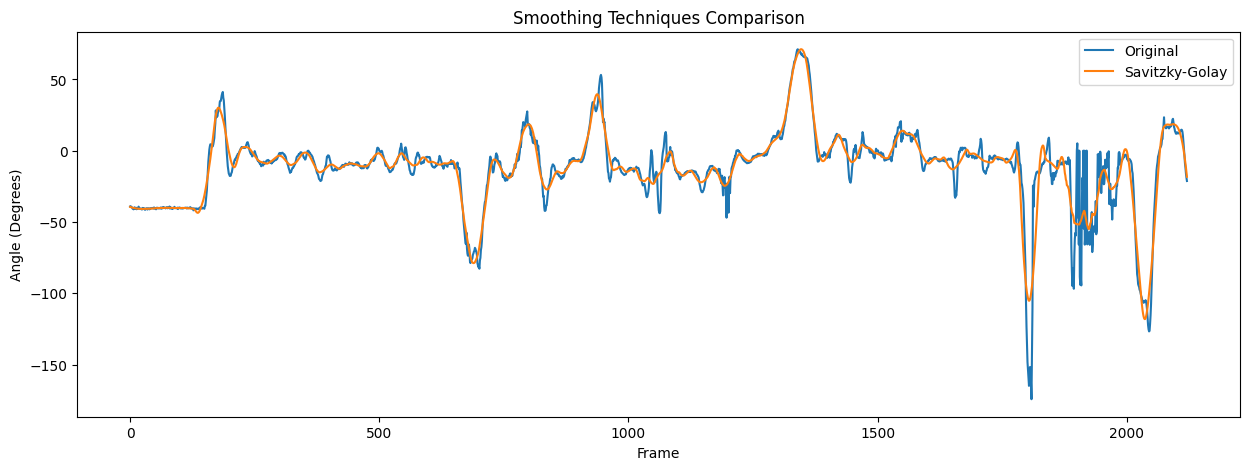

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, medfilt
from scipy.interpolate import UnivariateSpline

# Définition de la liste des intervalles de secondes associée à chacune des phases
L =  [[1, 'Marche lente', 9, 12], [2, 'Marche rapide', 16, 18], [3, 'Carton', 20,30],[4,'Saut',31,32],[5,'Tour sur place',34,38],[6,'4 inclinaisons',39,48],[7,'4 quarts de saut',48,54],[8, 'Poignée de main',55,58],[9,'Lancer de balle',58,62],[10,'Shadow boxing',62,68]]
# Conversion en liste d'intervalles de frames (en supposant 30 fps)
L_frames = [[L[i][0], L[i][1], L[i][2] * 30, L[i][3] * 30] for i in range(len(L))]

# Chargement des données à partir du fichier CSV
df_delta = pd.read_csv('csv/prise1/cleanDelta1.csv')

L_frames = [[i[0], i[1], int(i[2] * 30), int(i[3] * 30)] for i in L]

# Example column to smooth
column_to_smooth = 'Angle Bras Droit'

# Applying different smoothing techniques to the same curve
df_smoothed = pd.DataFrame()
df_smoothed['Frame'] = df_delta['Frame']
df_smoothed['Original'] = df_delta[column_to_smooth]

# Simple Moving Average with window size 5
df_smoothed['Moving_Average'] = df_delta[column_to_smooth].rolling(window=5).mean()

# Median Filter with kernel size 5
df_smoothed['Median_Filter'] = medfilt(df_delta[column_to_smooth], kernel_size=5)

# Savitzky-Golay filter with window size 51, polynomial order 3
df_smoothed['Savitzky_Golay'] = savgol_filter(df_delta[column_to_smooth], 51, 3)

# Univariate Spline with smoothing factor 5
spl = UnivariateSpline(df_delta['Frame'], df_delta[column_to_smooth], s=5)
df_smoothed['Univariate_Spline'] = spl(df_delta['Frame'])

# Visualization of the smoothing techniques
plt.figure(figsize=(15, 5))
plt.plot('Frame', 'Original', data=df_smoothed, label='Original')

plt.plot('Frame', 'Savitzky_Golay', data=df_smoothed, label='Savitzky-Golay')


plt.legend()
plt.title('Smoothing Techniques Comparison')
plt.xlabel('Frame')
plt.ylabel('Angle (Degrees)')
plt.show()

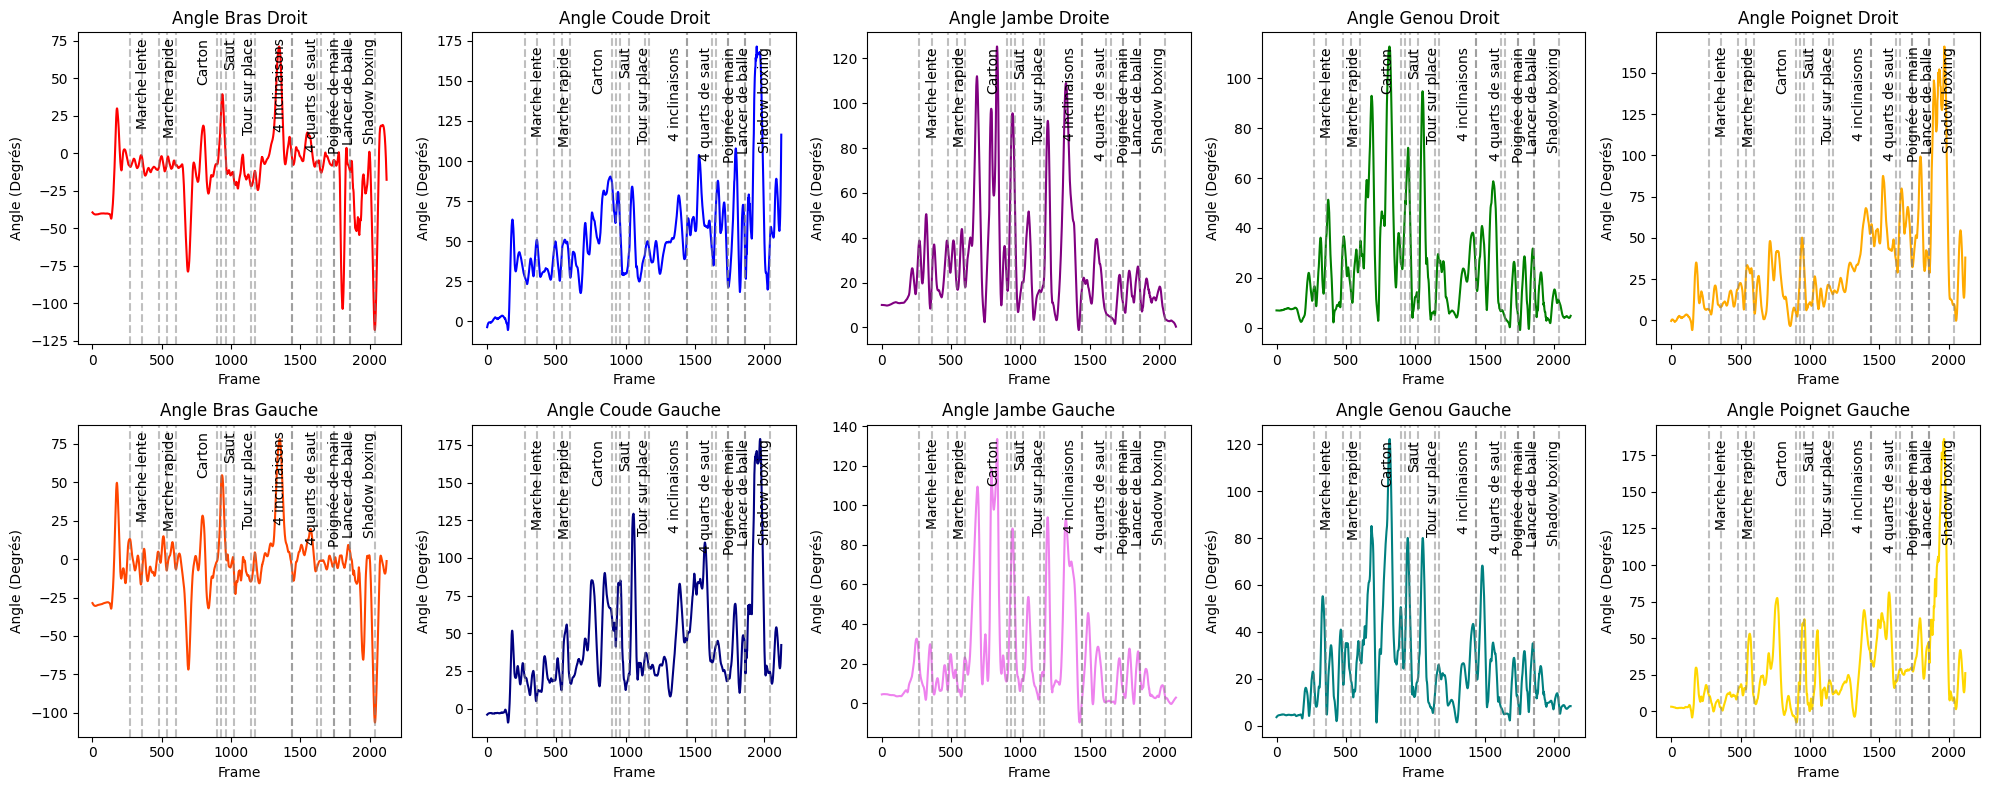

In [ ]:
# @title Visualisation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

# Définition de la liste des intervalles de secondes associée à chacune des phases
L =  [[1, 'Marche lente', 9, 12], [2, 'Marche rapide', 16, 18], [3, 'Carton', 20,30],[4,'Saut',31,32],[5,'Tour sur place',34,38],[6,'4 inclinaisons',39,48],[7,'4 quarts de saut',48,54],[8, 'Poignée de main',55,58],[9,'Lancer de balle',58,62],[10,'Shadow boxing',62,68]]
# Conversion en liste d'intervalles de frames (en supposant 30 fps)
L_frames = [[L[i][0], L[i][1], L[i][2] * 30, L[i][3] * 30] for i in range(len(L))]

# Chargement des données à partir du fichier CSV
df_delta = pd.read_csv('csv/prise1/cleanDelta1.csv')

L_frames = [[i[0], i[1], int(i[2] * 30), int(i[3] * 30)] for i in L]

# Séparation des colonnes par côté droit et gauche
right_columns = [col for col in df_delta.columns if 'Droit' in col]
left_columns = [col for col in df_delta.columns if 'Gauche' in col]

# Configuration de la grille de tracés (2 lignes x nombre de paires)
fig, axs = plt.subplots(2, len(right_columns), figsize=(20, 8))

# Colors in similar tones
colors = ['#FF0000', '#0000FF', '#800080', '#008000', '#FFAA00']
colors2 = ['#FF4500', '#000080', '#EE82EE', '#008080', '#FFD700']
# Tracé des mesures pour le côté droit (ligne supérieure)
window_size,poly_order = 52,3
for i, col in enumerate(right_columns):
    ax = axs[0, i]
    filtered_signal = savgol_filter(df_delta[col], window_size, poly_order)
    ax.plot(df_delta['Frame'], filtered_signal, label=f'Droit - {col}',color=colors[i])
    ax.set_title(col)
    ax.set_xlabel('Frame')
    ax.set_ylabel('Angle (Degrés)')

    # Ajout des lignes des phases
    for phase in L_frames:
        ax.axvline(x=phase[2], color='grey', linestyle='--', alpha=0.5)
        ax.axvline(x=phase[3], color='grey', linestyle='--', alpha=0.5)
        ax.text(x=(phase[2] + phase[3]) / 2, y=ax.get_ylim()[1] * 0.95, s=phase[1], rotation=90, verticalalignment='top')

# Tracé des mesures pour le côté gauche (ligne inférieure)
for i, col in enumerate(left_columns):
    ax = axs[1, i]
    filtered_signal = savgol_filter(df_delta[col], window_size, poly_order)
    ax.plot(df_delta['Frame'], filtered_signal, label=f'Gauche - {col}',color=colors2[i])
    ax.set_title(col)
    ax.set_xlabel('Frame')
    ax.set_ylabel('Angle (Degrés)')

    # Ajout des lignes des phases
    for phase in L_frames:
        ax.axvline(x=phase[2], color='grey', linestyle='--', alpha=0.5)
        ax.axvline(x=phase[3], color='grey', linestyle='--', alpha=0.5)
        ax.text(x=(phase[2] + phase[3]) / 2, y=ax.get_ylim()[1] * 0.95, s=phase[1], rotation=90, verticalalignment='top')



plt.tight_layout()
plt.show()

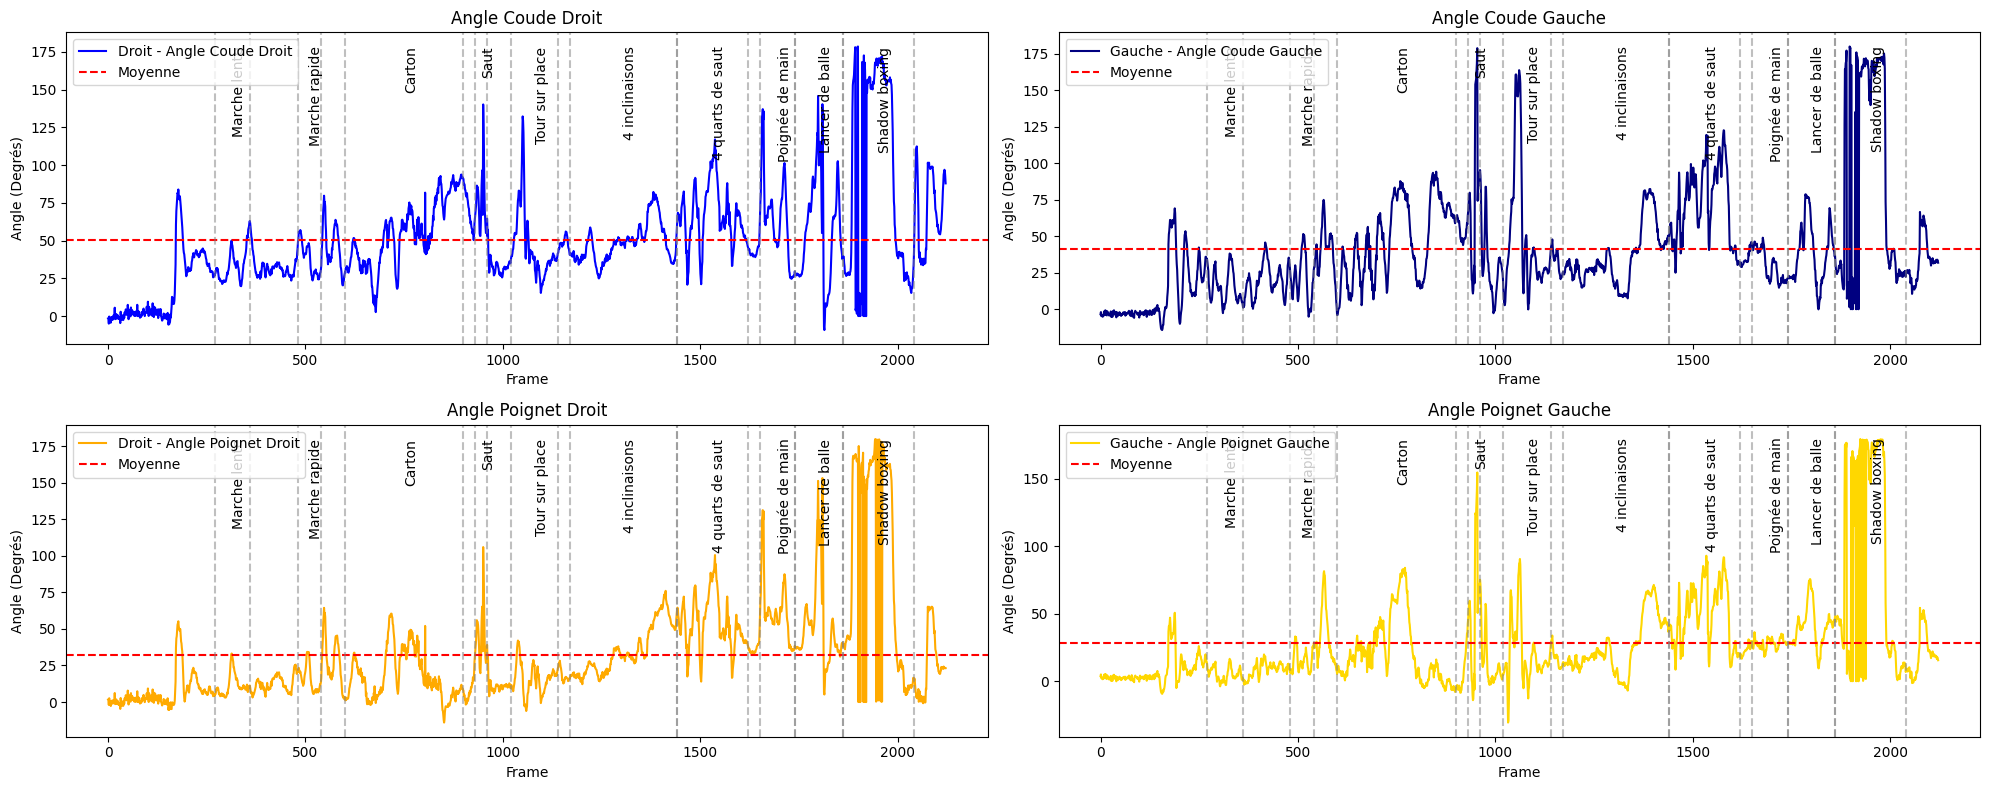

In [ ]:
#@title Courbes en plus grand
# @title Visualisation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

# Définition de la liste des intervalles de secondes associée à chacune des phases
L =  [[1, 'Marche lente', 9, 12], [2, 'Marche rapide', 16, 18], [3, 'Carton', 20,30],[4,'Saut',31,32],[5,'Tour sur place',34,38],[6,'4 inclinaisons',39,48],[7,'4 quarts de saut',48,54],[8, 'Poignée de main',55,58],[9,'Lancer de balle',58,62],[10,'Shadow boxing',62,68]]
# Conversion en liste d'intervalles de frames (en supposant 30 fps)
L_frames = [[L[i][0], L[i][1], L[i][2] * 30, L[i][3] * 30] for i in range(len(L))]

# Chargement des données à partir du fichier CSV
df_delta = pd.read_csv('csv/prise1/cleanDelta1.csv')

L_frames = [[i[0], i[1], int(i[2] * 30), int(i[3] * 30)] for i in L]

# Séparation des colonnes par côté droit et gauche
right_columns = [col for col in df_delta.columns if 'Droit' in col]
left_columns = [col for col in df_delta.columns if 'Gauche' in col]

# Configuration de la grille de tracés (2 lignes x nombre de paires)
fig, axs = plt.subplots( len(right_columns),2, figsize=(20, 8))

# Colors in similar tones
colors = ['#FF0000', '#0000FF', '#800080', '#008000', '#FFAA00']
colors2 = ['#FF4500', '#000080', '#EE82EE', '#008080', '#FFD700']
# Tracé des mesures pour le côté droit (ligne supérieure)
window_size,poly_order = 52,3
for i, col in enumerate(right_columns):
    ax = axs[i, 0]
    filtered_signal = savgol_filter(df_delta[col], window_size, poly_order)
    ax.plot(df_delta['Frame'], filtered_signal, label=f'Droit - {col}',color=colors[i])
    ax.set_title(col)
    ax.set_xlabel('Frame')
    ax.set_ylabel('Angle (Degrés)')

    # Ajout des lignes des phases
    for phase in L_frames:
        ax.axvline(x=phase[2], color='grey', linestyle='--', alpha=0.5)
        ax.axvline(x=phase[3], color='grey', linestyle='--', alpha=0.5)
        ax.text(x=(phase[2] + phase[3]) / 2, y=ax.get_ylim()[1] * 0.95, s=phase[1], rotation=90, verticalalignment='top')

# Tracé des mesures pour le côté gauche (ligne inférieure)
for i, col in enumerate(left_columns):
    ax = axs[i, 1]
    filtered_signal = savgol_filter(df_delta[col], window_size, poly_order)
    ax.plot(df_delta['Frame'], filtered_signal, label=f'Gauche - {col}',color=colors2[i])
    ax.set_title(col)
    ax.set_xlabel('Frame')
    ax.set_ylabel('Angle (Degrés)')

    # Ajout des lignes des phases
    for phase in L_frames:
        ax.axvline(x=phase[2], color='grey', linestyle='--', alpha=0.5)
        ax.axvline(x=phase[3], color='grey', linestyle='--', alpha=0.5)
        ax.text(x=(phase[2] + phase[3]) / 2, y=ax.get_ylim()[1] * 0.95, s=phase[1], rotation=90, verticalalignment='top')



plt.tight_layout()
plt.show()

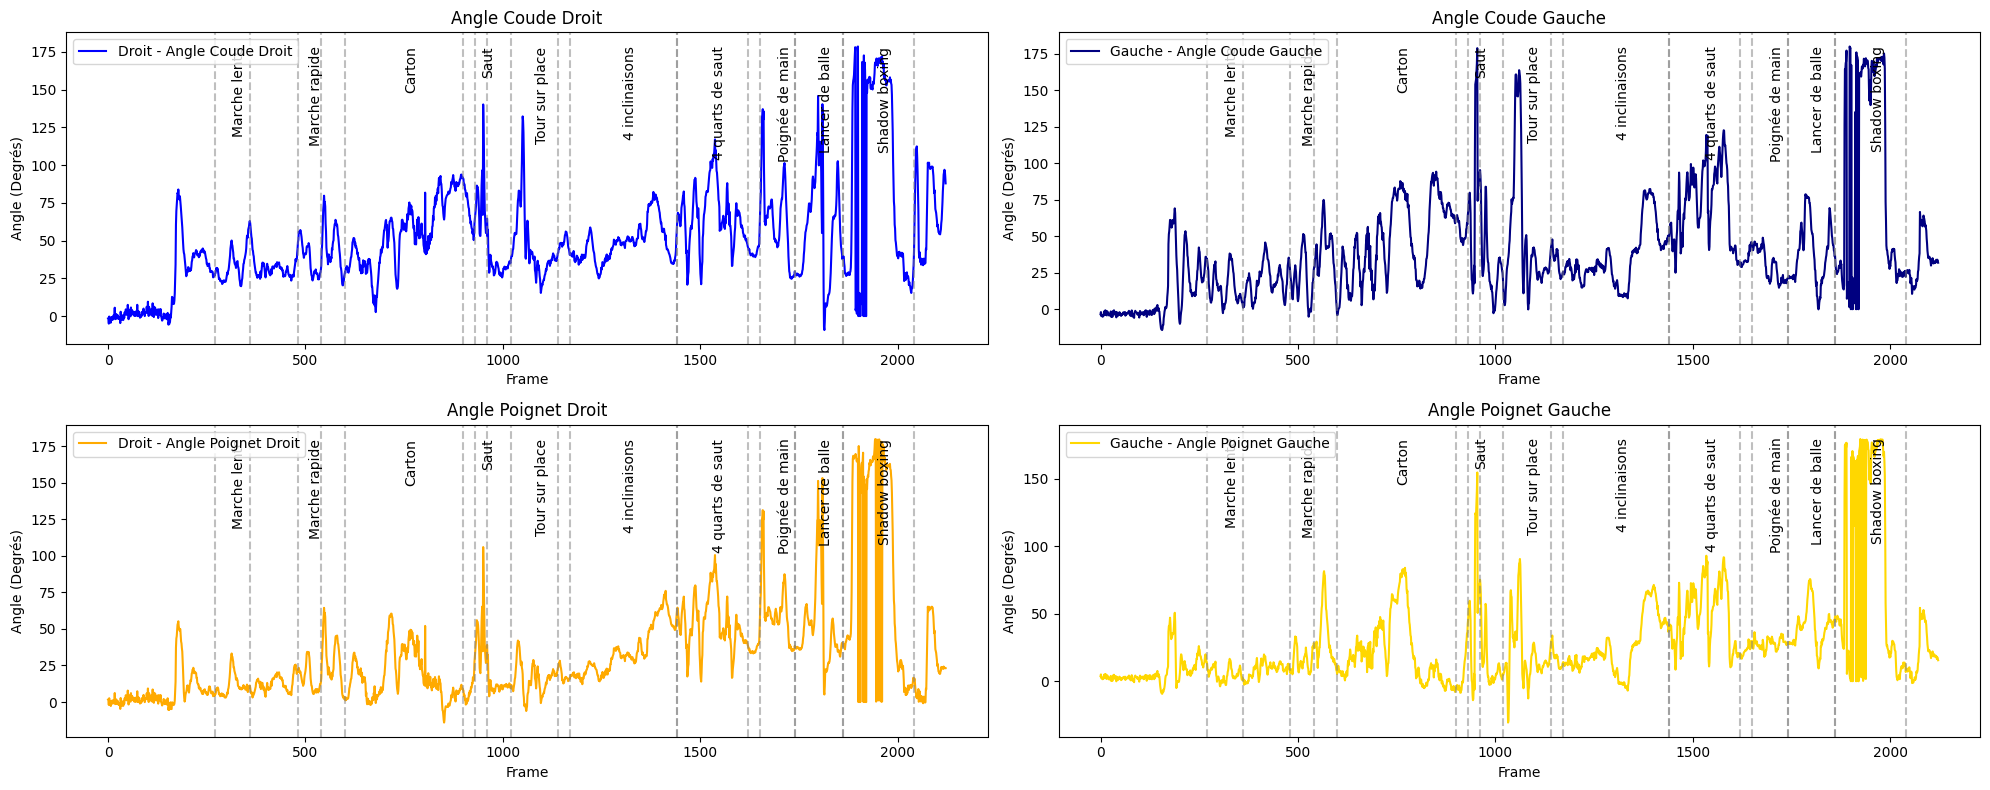

In [ ]:
#@title Accent sur 2 articulations
# @title Visualisation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Définition de la liste des intervalles de secondes associée à chacune des phases
L =  [[1, 'Marche lente', 9, 12], [2, 'Marche rapide', 16, 18], [3, 'Carton', 20,30],[4,'Saut',31,32],[5,'Tour sur place',34,38],[6,'4 inclinaisons',39,48],[7,'4 quarts de saut',48,54],[8, 'Poignée de main',55,58],[9,'Lancer de balle',58,62],[10,'Shadow boxing',62,68]]
# Conversion en liste d'intervalles de frames (en supposant 30 fps)
L_frames = [[L[i][0], L[i][1], L[i][2] * 30, L[i][3] * 30] for i in range(len(L))]

# Chargement des données à partir du fichier CSV
df_delta = pd.read_csv('csv/prise1/cleanDelta1.csv')

L_frames = [[i[0], i[1], int(i[2] * 30), int(i[3] * 30)] for i in L]

# Séparation des colonnes par côté droit et gauche
right_columns = [col for col in df_delta.columns if 'Droit' in col]
left_columns = [col for col in df_delta.columns if 'Gauche' in col]

# Configuration de la grille de tracés (2 lignes x nombre de paires)
fig, axs = plt.subplots( 2,2, figsize=(20, 8))

# Colors in similar tones
colors = ['#FF0000', '#0000FF', '#800080', '#008000', '#FFAA00']
colors2 = ['#FF4500', '#000080', '#EE82EE', '#008080', '#FFD700']
# Tracé des mesures pour le côté droit (ligne supérieure)
window_size,poly_order = 52,3
k = 0
# Tracé pour le côté droit
for i, col in enumerate(right_columns):
    if col in ["Angle Coude Droit", "Angle Poignet Droit"]:
        ax = axs[k, 0]
        ax.plot(df_delta['Frame'], df_delta[col], label=f'Droit - {col}', color=colors[i])
        ax.set_title(col)
        ax.set_xlabel('Frame')
        ax.set_ylabel('Angle (Degrés)')

        # Calcul et tracé de la moyenne
        mean_value = np.mean(df_delta[col])

        ax.legend()

        for phase in L_frames:
            ax.axvline(x=phase[2], color='grey', linestyle='--', alpha=0.5)
            ax.axvline(x=phase[3], color='grey', linestyle='--', alpha=0.5)
            ax.text(x=(phase[2] + phase[3]) / 2, y=ax.get_ylim()[1] * 0.95, s=phase[1], rotation=90, verticalalignment='top')

        k += 1

k = 0  # Réinitialisation de l'index pour les tracés gauche

# Tracé pour le côté gauche
for i, col in enumerate(left_columns):
    if col in ["Angle Coude Gauche", "Angle Poignet Gauche"]:
        ax = axs[k, 1]

        ax.plot(df_delta['Frame'], df_delta[col], label=f'Gauche - {col}', color=colors2[i])
        ax.set_title(col)
        ax.set_xlabel('Frame')
        ax.set_ylabel('Angle (Degrés)')

        # Calcul et tracé de la moyenne
        mean_value = np.mean(df_delta[col])

        ax.legend()

        for phase in L_frames:
            ax.axvline(x=phase[2], color='grey', linestyle='--', alpha=0.5)
            ax.axvline(x=phase[3], color='grey', linestyle='--', alpha=0.5)
            ax.text(x=(phase[2] + phase[3]) / 2, y=ax.get_ylim()[1] * 0.95, s=phase[1], rotation=90, verticalalignment='top')

        k += 1

plt.tight_layout()
plt.show()

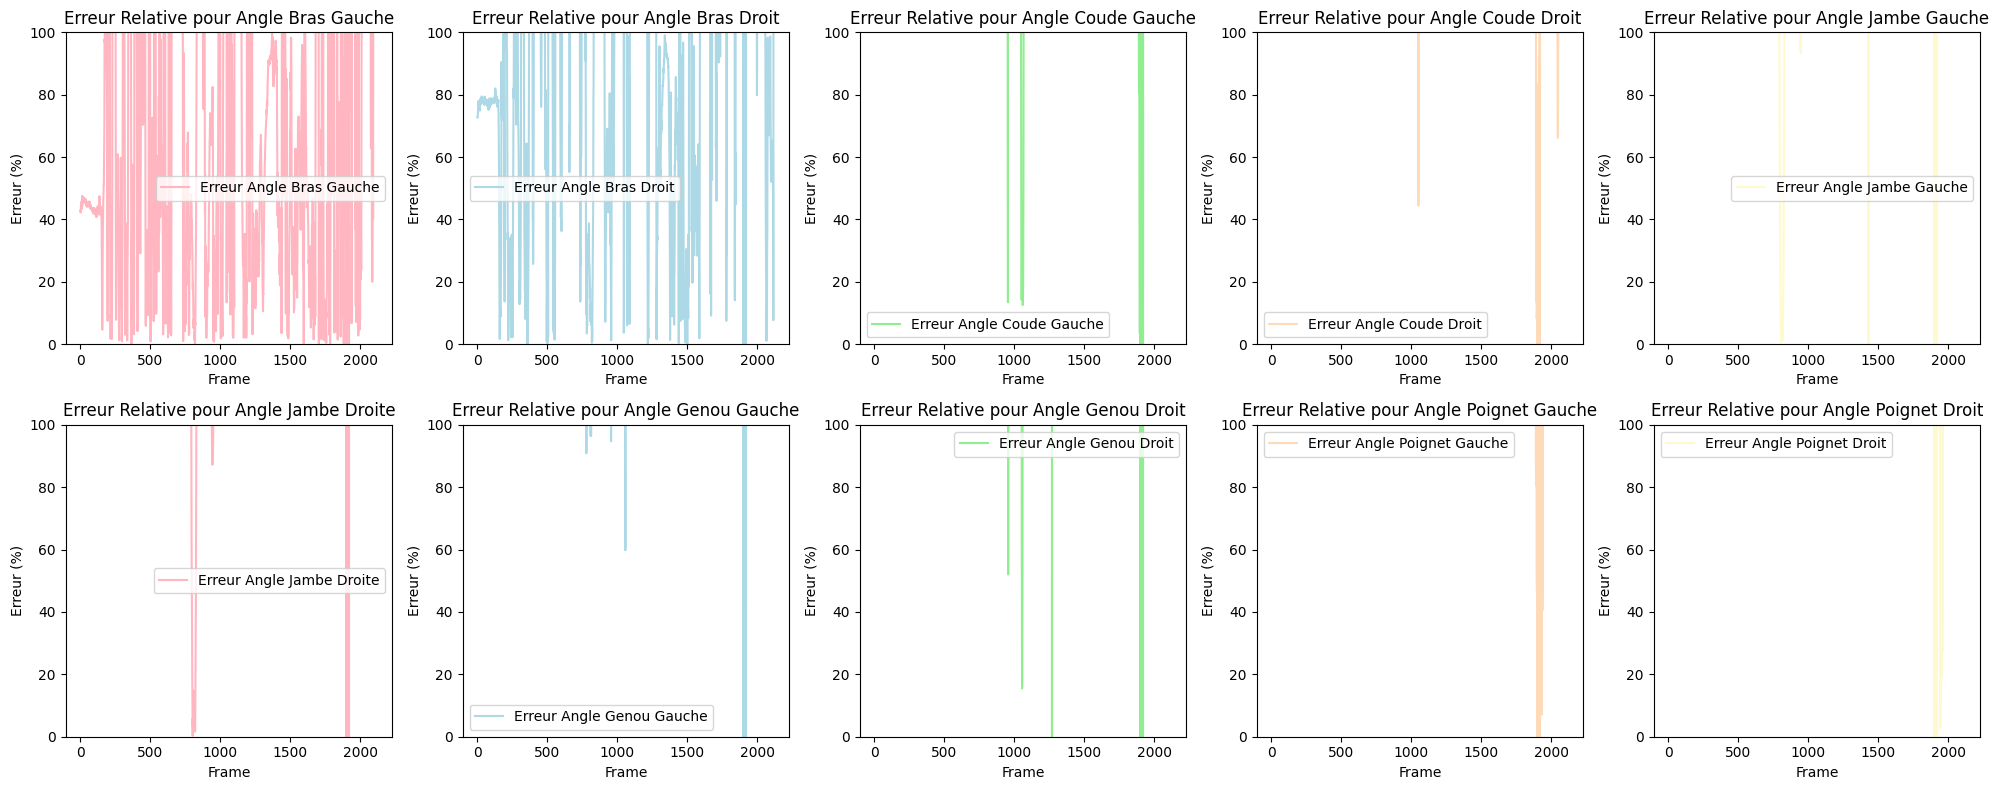

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


i="1"
# Chemin vers le fichier CSV d'erreurs relatives
outputRelativeErrorFile = "csv/prise"+i+'/deltaRelative'+i+'.csv'
# Chargement des données à partir du fichier CSV
df_errors = pd.read_csv(outputRelativeErrorFile)

# Configuration de la grille de tracés (2 lignes x nombre de paires)
fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # Adapté pour 10 plots

# Couleurs pastel pour les tracés
colors = ['#FFB6C1', '#ADD8E6', '#90EE90', '#FFDAB9', '#FFFACD']
colors2 = ['#FF69B4', '#4682B4', '#3CB371', '#FFA07A', '#FFFFE0']

# Tracé des mesures pour chaque colonne d'erreur
for i, col in enumerate(df_errors.columns[1:]):  # Sauter la colonne 'Frame'
    ax = axs[i // 5, i % 5]  # Placement sur la grille
    ax.plot(df_errors['Frame'], df_errors[col], label=f'Erreur {col}', color=colors[i % 5])
    ax.set_title(f'Erreur Relative pour {col}')
    ax.set_xlabel('Frame')
    ax.set_ylabel('Erreur (%)')
    ax.set_ylim([0, 100])  # Définir les limites de l'axe y de 0 à 100%
    ax.legend()

plt.tight_layout()
plt.show()


###Analyse

Les graphiques montrent les différences d'angle pour chaque phase, avec des zones ombrées rouges indiquant les différentes phases. En analysant ces graphiques, nous pouvons identifier des changements notables ou des anomalies et les relier aux phases spécifiques.

Observations et Analyse Potentielles
Changements Importants : Sur plusieurs graphiques, nous observons des pics ou des chutes abruptes dans les différences d'angle qui pourraient indiquer des transitions rapides ou des ajustements brusques dans le mouvement.
Corrélation avec les Phases : Ces changements se produisent souvent à proximité ou pendant les transitions entre les phases, ce qui pourrait indiquer des erreurs de mesure, des réajustements du sujet ou des mouvements particulièrement dynamiques associés à ces activités.
Exemple Spécifique
Supposons qu'un pic particulièrement aigu est observé dans le graphique pour "Angle Difference" lors de la transition entre "Marche rapide" et "Carton". Ce pic pourrait indiquer un ajustement brusque dans la posture ou le mouvement du sujet, potentiellement en raison d'un changement d'activité ou une réaction à une instruction.
Interprétation et Explication
Mouvements Complexes ou Rapides : Si le pic correspond à une phase comme le "Saut", cela pourrait s'expliquer par la nature dynamique du saut qui nécessite un changement rapide et important de la posture et des angles des membres.
Erreur de Mesure ou de Calibration : Si les pics ne correspondent pas logiquement aux mouvements attendus, cela pourrait aussi indiquer un problème avec l'équipement de mesure ou la méthode de calibration.

Analyse Détaillée des Observations Spécifiques
Phase "Saut" (Frames environ 720 à 795)
Observation: Sur plusieurs graphiques, il y a une augmentation notable des différences d'angle pendant cette phase.
Analyse: Cette augmentation est cohérente avec l'activité de saut, où les mouvements rapides et énergiques des jambes et des bras sont nécessaires pour accomplir un saut. Cela pourrait résulter en des différences d'angle plus marquées dues à des mouvements plus dynamiques.
Implication: Cette observation est conforme à l'attente des mouvements dans cette phase, indiquant une mesure correcte et attendue pour un saut.
Transition entre "Marche rapide" et "Carton" (Frames environ 360 à 660)
Observation: Il y a des fluctuations notables dans les différences d'angle dans cette transition.
Analyse: Les fluctuations peuvent indiquer un changement dans le type de mouvement ou dans la vitesse de marche qui prépare ou suit un événement spécifique comme manipuler un carton. Les ajustements dans la posture pour saisir ou déplacer un carton peuvent affecter considérablement les angles mesurés.
Implication: Si les fluctuations sont significatives et cohérentes à travers plusieurs cycles de marche, cela pourrait signaler des ajustements posturaux répétitifs ou des erreurs dans la capture des mouvements standard de marche.
Phase "Shadow boxing" (Frames environ 1500 à 1605)
Observation: Il existe une variation continue et régulière des angles, ce qui est différent des autres phases où les changements sont plus abrupts.
Analyse: Le shadow boxing implique des mouvements continus et répétitifs des bras, ce qui se reflète dans les changements réguliers et rythmiques des angles. Cette observation suggère que les mouvements sont capturés avec précision, reflétant la nature continue de l'activité.
Implication: Cette régularité dans la variation des angles peut être utilisée pour vérifier la cohérence des mouvements du sujet et la fiabilité de la capture des données pour des mouvements complexes et rapides.
Conclusion
Ces exemples spécifiques montrent comment les données des graphiques peuvent être interprétées directement en relation avec les activités prévues pendant les phases de l'expérience. En observant les variations et les anomalies dans les graphiques en parallèle avec les phases d'activité, nous pouvons mieux comprendre comment les mouvements du sujet sont exécutés et capturés, et potentiellement identifier des domaines où la capture de mouvement pourrait être améliorée ou où les mouvements du sujet ne sont pas conformes aux attentes.